In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [6]:
data_df = pd.read_csv("data_analysis.csv")
ai_uses_df = pd.read_csv("AI_uses.csv")

In [7]:
data_df.columns

Index(['Participant ID', 'Timestamp', 'Gender', 'Affiliation with UChicago',
       'If you are a student, what is your major(s)? If you are an alumni, what was your major(s)? If you are faculty, what is your affiliation? If you are none of the above, please write "N/A".',
       'Do you consider yourself an artist? (visual arts, writing, performing arts, etc)',
       '(Image #1) How appropriate do you think this use of AI-generated art is?',
       'Image_1_appropriate',
       '(Image #1) How do you feel about this use of AI-generated art?',
       'Image_1_feeling',
       '(Image #1) Do you think this is a fair use of AI-generated artwork?',
       'Image_1_fair',
       '(Image #2) How appropriate do you think this use of AI-generated art is?',
       'Image_2_appropriate',
       '(Image #2) How do you feel about this use of AI-generated art?',
       'Image_2_feeling',
       '(Image #2) Do you think this is a fair use of AI-generated artwork?',
       'Image_2_fair',
       '(

## Demographic

In [8]:
data_df["Gender"].value_counts()

Gender
Female       21
Male          7
Nonbinary     3
Name: count, dtype: int64

In [9]:
data_df["Do you consider yourself an artist? (visual arts, writing, performing arts, etc)"].value_counts()

Do you consider yourself an artist? (visual arts, writing, performing arts, etc)
Yes    17
No     14
Name: count, dtype: int64

## ANOVA test

In [10]:
numerical_only = data_df[["Image_1_appropriate",
                          "Image_1_feeling",
                          "Image_1_fair",
                          "Image_2_appropriate",
                          "Image_2_feeling",
                          "Image_2_fair",
                          "Image_3_appropriate",
                          "Image_3_feeling",
                          "Image_3_fair",
                          "Image_4_appropriate",
                          "Image_4_feeling",
                          "Image_4_fair",
                          ]]

In [11]:
for lst in ["Image_1_appropriate",
                          "Image_1_feeling",
                          "Image_1_fair",
                          "Image_2_appropriate",
                          "Image_2_feeling",
                          "Image_2_fair",
                          "Image_3_appropriate",
                          "Image_3_feeling",
                          "Image_3_fair",
                          "Image_4_appropriate",
                          "Image_4_feeling",
                          "Image_4_fair",
                          ]:
    print(np.mean(numerical_only[lst]))

2.774193548387097
2.806451612903226
2.774193548387097
2.2580645161290325
2.193548387096774
2.129032258064516
3.064516129032258
3.032258064516129
3.032258064516129
2.064516129032258
2.161290322580645
2.129032258064516


In [12]:
# personal use: images 1+3
personal_appropriate = list(numerical_only["Image_1_appropriate"])
personal_appropriate.extend(list(numerical_only["Image_3_appropriate"]))
personal_feeling = list(numerical_only["Image_1_feeling"])
personal_feeling.extend(list(numerical_only["Image_3_feeling"]))
personal_fair = list(numerical_only["Image_1_fair"])
personal_fair.extend(list(numerical_only["Image_3_fair"]))
# business use: images 2+4
business_appropriate = list(numerical_only["Image_2_appropriate"])
business_appropriate.extend(list(numerical_only["Image_4_appropriate"]))
business_feeling = list(numerical_only["Image_2_feeling"])
business_feeling.extend(list(numerical_only["Image_4_feeling"]))
business_fair = list(numerical_only["Image_2_fair"])
business_fair.extend(list(numerical_only["Image_4_fair"]))

In [13]:
for lst in [personal_appropriate, personal_feeling, personal_fair, business_appropriate, business_feeling, business_fair]:
    print(f"{np.mean(lst)}")

2.9193548387096775
2.9193548387096775
2.903225806451613
2.161290322580645
2.1774193548387095
2.129032258064516


In [14]:
# appropriateness
print(f_oneway(personal_appropriate, business_appropriate))
# feeling
print(f_oneway(personal_feeling, business_feeling))
# fairness
print(f_oneway(personal_fair, business_fair))

F_onewayResult(statistic=10.922347410229397, pvalue=0.0012477285492226778)
F_onewayResult(statistic=11.71926638823316, pvalue=0.0008427615226903605)
F_onewayResult(statistic=12.032876712328763, pvalue=0.0007229684966787471)


# One Sample t-test

In [15]:
from scipy.stats import ttest_1samp
print(f"Personal Appropriateness: {ttest_1samp(personal_appropriate, 3)}")
print(f"Personal Feeling: {ttest_1samp(personal_feeling, 3)}")
print(f"Personal Fairness: {ttest_1samp(personal_fair, 3)}")
print(f"Business Appropriateness: {ttest_1samp(business_appropriate, 3)}")
print(f"Business Feeling: {ttest_1samp(business_feeling, 3)}")
print(f"Business Fairness: {ttest_1samp(business_fair, 3)}")

Personal Appropriateness: TtestResult(statistic=-0.4715935396889876, pvalue=0.6388994098330425, df=61)
Personal Feeling: TtestResult(statistic=-0.5153961243100692, pvalue=0.6081391194314099, df=61)
Personal Fairness: TtestResult(statistic=-0.6092591850468024, pvalue=0.5446152515209033, df=61)
Business Appropriateness: TtestResult(statistic=-5.486280167198236, pvalue=8.361960715612236e-07, df=61)
Business Feeling: TtestResult(statistic=-5.485373548451691, pvalue=8.390707103677136e-07, df=61)
Business Fairness: TtestResult(statistic=-5.555161525081268, pvalue=6.439756830083958e-07, df=61)


# Use of AI

In [16]:
data_df["Have you ever used generative AI to create art? "].unique()

array([nan, 'No', 'Yes'], dtype=object)

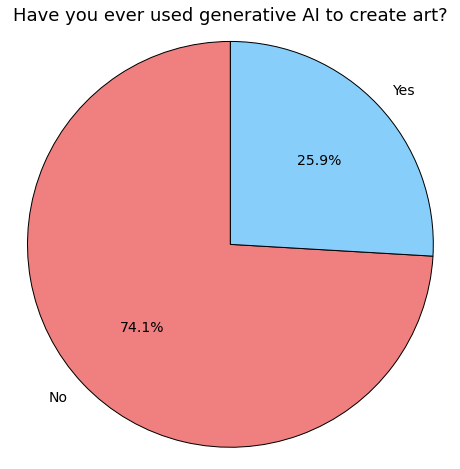

In [17]:
used_AI = data_df["Have you ever used generative AI to create art? "].dropna()
counts = {}
for val in used_AI:
    counts[val] = counts.get(val, 0) + 1
labels = counts.keys()
sizes = counts.values()
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('Have you ever used generative AI to create art?', size=18)
plt.show()

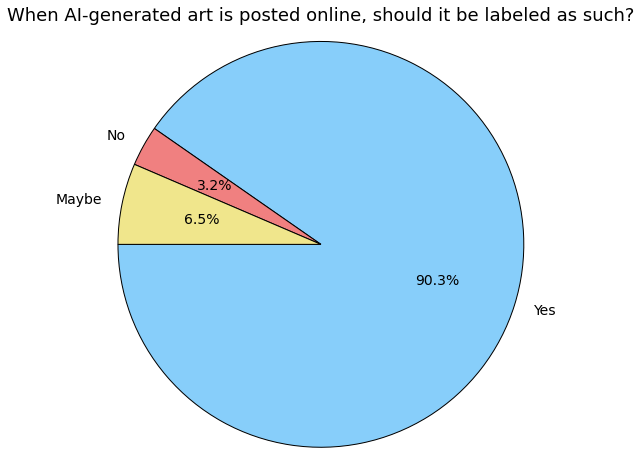

In [18]:
used_AI = data_df["When AI-generated art is posted online, should it be labeled as such?"].dropna()
counts = {}
for val in used_AI:
    counts[val] = counts.get(val, 0) + 1
labels = counts.keys()
sizes = counts.values()
colors = ['lightskyblue','lightcoral', 'khaki', ]
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('When AI-generated art is posted online, should it be labeled as such?', size=18)
plt.show()

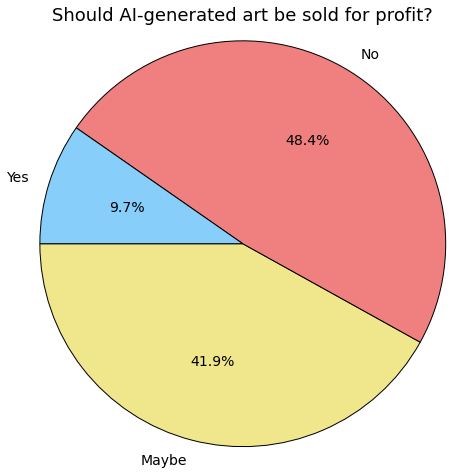

In [19]:
used_AI = data_df["Should AI-generated art be sold for profit?"].dropna()
counts = {}
for val in used_AI:
    counts[val] = counts.get(val, 0) + 1
labels = counts.keys()
sizes = counts.values()
colors = ['khaki','lightcoral', 'lightskyblue', ]
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('Should AI-generated art be sold for profit?', size=18)
plt.show()

#  Appropriate AI Uses

In [20]:
ai_uses_df.columns

Index(['Participant ID', 'Answer', 'Personal Enjoyment',
       'Education & Learning', 'Concept Art & Inspiration',
       'Marketing & Advertising', 'Game & Film Production',
       'Political Messaging & Propaganda', 'News & Illustrations',
       'Custom Avatars & Portraits', 'Collaborative Art',
       'Deepfakes & AI-Generated Celebrities', 'NFTs & Digital Art Market',
       'None'],
      dtype='object')

In [21]:
uses = ai_uses_df.columns[2:]
counts = []

for use in uses:
    counts.append(ai_uses_df[use].sum())

Text(0.5, 0, 'Count')

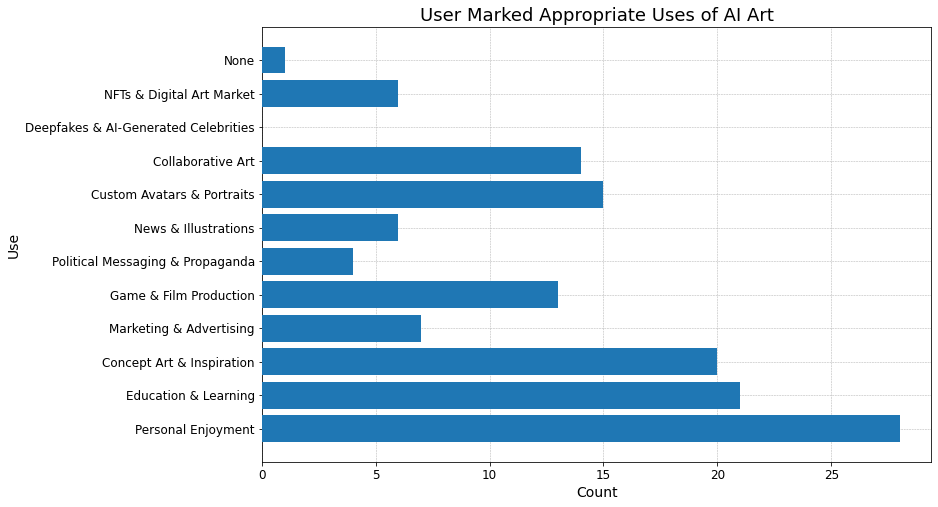

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(linestyle='--', linewidth=0.5, zorder = 20)
ax.barh(uses, counts, label=uses, zorder = 19)
plt.title("User Marked Appropriate Uses of AI Art", size=18)
plt.ylabel("Use", size=14)
plt.yticks(zorder=18, size=12)
plt.xticks(zorder=18, size=12)
plt.xlabel("Count", size=14)
